In [1]:
import numpy as np
from datetime import datetime 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import LeNet

import matplotlib.pyplot as plt

# check device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 15

IMG_SIZE = 32
N_CLASSES = 10

In [3]:
# define transforms
transforms = transforms.Compose([transforms.Resize((32, 32)),
                                 transforms.ToTensor()])

# download and create datasets
train_dataset = datasets.MNIST(root='mnist_data', 
                               train=True, 
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='mnist_data', 
                               train=False, 
                               transform=transforms)

# define the data loaders
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=False)

In [4]:
torch.manual_seed(RANDOM_SEED)

model = LeNet.LeNet5(N_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

In [5]:
model, optimizer, losses = LeNet.training_loop(model, criterion, optimizer, train_loader, valid_loader, N_EPOCHS, DEVICE)

11:55:10 --- Epoch: 0	Train loss: 0.2300	Valid loss: 0.0898	Train accuracy: 97.33	Valid accuracy: 97.27
11:55:49 --- Epoch: 1	Train loss: 0.0789	Valid loss: 0.0808	Train accuracy: 97.85	Valid accuracy: 97.59
11:56:28 --- Epoch: 2	Train loss: 0.0555	Valid loss: 0.0553	Train accuracy: 98.60	Valid accuracy: 98.28
11:57:07 --- Epoch: 3	Train loss: 0.0444	Valid loss: 0.0491	Train accuracy: 98.93	Valid accuracy: 98.47
11:57:46 --- Epoch: 4	Train loss: 0.0348	Valid loss: 0.0465	Train accuracy: 99.21	Valid accuracy: 98.55
11:58:25 --- Epoch: 5	Train loss: 0.0298	Valid loss: 0.0426	Train accuracy: 99.29	Valid accuracy: 98.65
11:59:04 --- Epoch: 6	Train loss: 0.0257	Valid loss: 0.0441	Train accuracy: 99.42	Valid accuracy: 98.63
11:59:43 --- Epoch: 7	Train loss: 0.0225	Valid loss: 0.0485	Train accuracy: 99.32	Valid accuracy: 98.46
12:00:22 --- Epoch: 8	Train loss: 0.0192	Valid loss: 0.0524	Train accuracy: 99.20	Valid accuracy: 98.45
12:01:02 --- Epoch: 9	Train loss: 0.0178	Valid loss: 0.0443	Trai

In [6]:
SAVE_PATH = 'trained_model/mnist'
torch.save(model.state_dict(), SAVE_PATH)

In [7]:
def plot_losses(train_losses, valid_losses):
    '''
    Function for plotting training and validation losses
    '''
    
    # temporarily change the style of the plots to seaborn 
    plt.style.use('seaborn')

    train_losses = np.array(train_losses) 
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss') 
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs", 
            xlabel='Epoch',
            ylabel='Loss') 
    ax.legend()
    fig.show()
    
    # change the plot style to default
    plt.style.use('default')

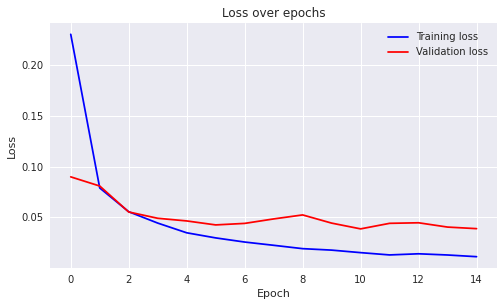

In [8]:
plot_losses(losses[0], losses[1])

In [9]:
ROW_IMG = 10
N_ROWS = 5

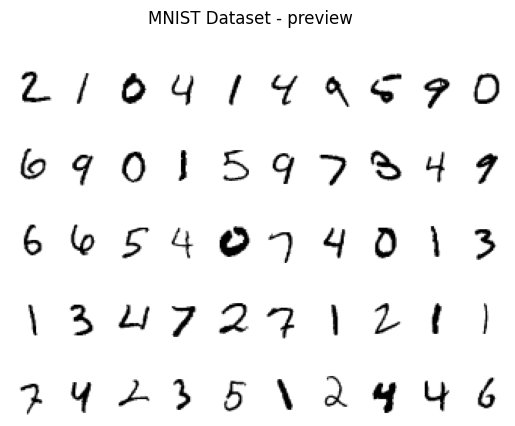

In [10]:
fig = plt.figure()
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.data[index], cmap = 'gray_r')
fig.suptitle('MNIST Dataset - preview');

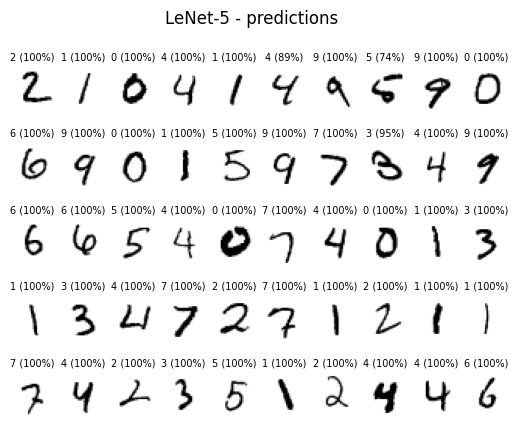

In [11]:
fig = plt.figure()
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.data[index], cmap='gray_r')
    
    with torch.no_grad():
        model.eval()
        y_hat = model(valid_dataset[index][0].unsqueeze(0))
        probs = F.softmax(y_hat, dim=1)
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    
    plt.title(title, fontsize=7)
fig.suptitle('LeNet-5 - predictions');